In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,gvtec3,gvtec3_dt,s4
2013-12-01 02:10:00,38.901869,-1.406371,0.090805,-3.012794,-0.302865,-0.138129,-2.709478,-0.748023,-0.046265,0.116034
2013-12-01 02:20:00,37.676039,-1.201542,0.204829,-3.176458,-0.149123,-1.840996,-1.712064,-0.797389,-0.046810,0.112015
2013-12-01 02:30:00,36.751092,-0.957067,0.244475,-3.090844,0.030793,-2.211419,-0.669840,-0.815543,-0.040540,0.111552
2013-12-01 02:40:00,36.059834,-0.762969,0.194098,-2.880283,0.127728,-1.957485,-0.038873,-0.858718,-0.060494,0.108269
2013-12-01 02:50:00,35.416633,-0.653073,0.109896,-2.733366,0.097938,-1.737745,0.141762,-0.969081,-0.102394,0.106616


Delay: -40.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.85278624, 0.85191031, 0.85110552, 0.85036399, 0.84966756,
        0.84899087, 0.8483039 , 0.84757252, 0.84676235, 0.84584761,
        0.8448212 , 0.84359758, 0.84229586, 0.84094461, 0.83957238,
        0.83819862, 0.83683037, 0.83546536, 0.83409722, 0.83272103,
        0.83133698]),
 <matplotlib.lines.Line2D at 0x7f03301fb438>)

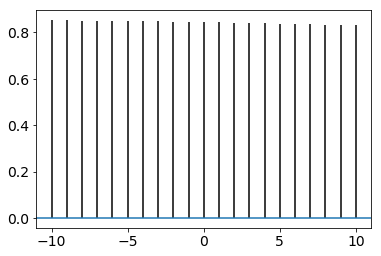

In [3]:
corr = np.correlate(df['vtec'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec'].values.ravel(),df['s4'].values.ravel())

Delay: 205.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.03696239, -0.03449425, -0.03206756, -0.02985816, -0.02813513,
        -0.02721627, -0.02738054, -0.02876599, -0.03129726, -0.03467079,
        -0.03841053, -0.0418732 , -0.0447123 , -0.04665838, -0.04769667,
        -0.04803906, -0.04801591, -0.04792606, -0.04792249, -0.04800093,
        -0.04807804]),
 <matplotlib.lines.Line2D at 0x7f033010a240>)

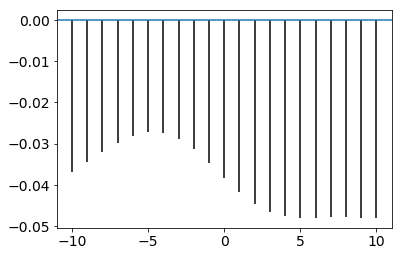

In [4]:
corr = np.correlate(df['vtec_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec_dt'].values.ravel(),df['s4'].values.ravel())

Delay: -95.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 1.10972397e-02,  1.12463629e-02,  1.10646223e-02,  1.01331414e-02,
         8.05228500e-03,  4.61415182e-03, -8.72943654e-06, -5.21113409e-03,
        -1.00900295e-02, -1.36827619e-02, -1.52316092e-02, -1.45515589e-02,
        -1.18734746e-02, -8.04462235e-03, -4.15672674e-03, -1.18411705e-03,
         3.67526409e-04,  6.39359048e-04,  2.55456179e-04, -1.10733786e-04,
        -1.16989100e-04]),
 <matplotlib.lines.Line2D at 0x7f03300f0390>)

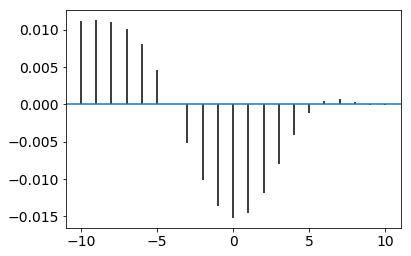

In [5]:
corr = np.correlate(df['vtec_dt2'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['vtec_dt2'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['vtec_dt2'].values.ravel(),df['s4'].values.ravel())

Delay: 141.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.23500838, -0.23874966, -0.24254223, -0.24610245, -0.24898152,
        -0.25064068, -0.25061104, -0.24868301, -0.24501888, -0.24012032,
        -0.23467477, -0.22911709, -0.22405603, -0.21952041, -0.21523842,
        -0.21082017, -0.20597015, -0.20062588, -0.19496725, -0.18932167,
        -0.18403031]),
 <matplotlib.lines.Line2D at 0x7f03300526a0>)

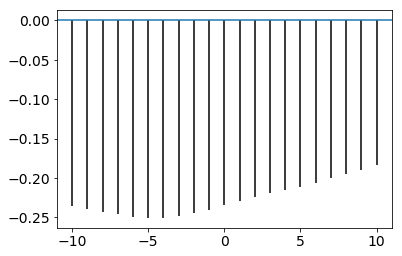

In [6]:
corr = np.correlate(df['gvtec1'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec1'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec1'].values.ravel(),df['s4'].values.ravel())

Delay: 146.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.0201335 , -0.02077399, -0.0206205 , -0.01877453, -0.01445253,
        -0.00735857,  0.00200658,  0.0123078 ,  0.02172666,  0.02859648,
         0.03202962,  0.03214148,  0.03021978,  0.02796359,  0.02680834,
         0.02736197,  0.02926394,  0.03149321,  0.03291313,  0.03276567,
         0.03091153]),
 <matplotlib.lines.Line2D at 0x7f0330030710>)

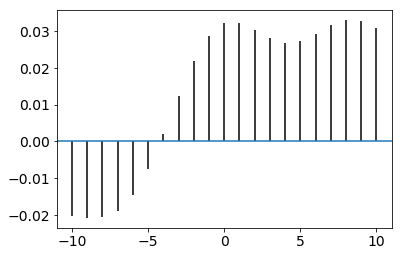

In [7]:
corr = np.correlate(df['gvtec1_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec1_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec1_dt'].values.ravel(),df['s4'].values.ravel())

Delay: -54.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.40136132, 0.40241982, 0.40331054, 0.40411671, 0.40497032,
        0.40597983, 0.40715245, 0.40834594, 0.40928156, 0.40962516,
        0.40910282, 0.40779245, 0.40561467, 0.40286432, 0.39995267,
        0.39728704, 0.39515092, 0.39363928, 0.39268398, 0.3921418 ,
        0.39188521]),
 <matplotlib.lines.Line2D at 0x7f0323f8b940>)

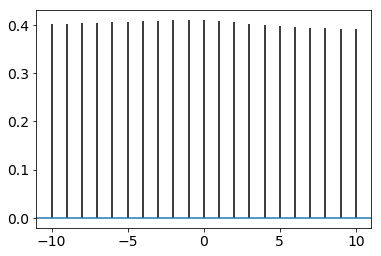

In [8]:
corr = np.correlate(df['gvtec2'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec2'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec2'].values.ravel(),df['s4'].values.ravel())

Delay: 7833.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01060513,  0.00939824,  0.0081886 ,  0.00760919,  0.00797628,
         0.00903791,  0.00996286,  0.00960949,  0.00698825,  0.00173306,
        -0.00564928, -0.01372459, -0.020948  , -0.02575845, -0.02724523,
        -0.02544726, -0.02128908, -0.01615484, -0.01130338, -0.00742128,
        -0.00451252]),
 <matplotlib.lines.Line2D at 0x7f0323f6d5f8>)

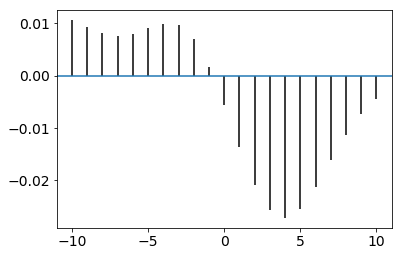

In [9]:
corr = np.correlate(df['gvtec2_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec2_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec2_dt'].values.ravel(),df['s4'].values.ravel())

Delay: -4.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.26242808, -0.26727935, -0.27251084, -0.27776658, -0.28246275,
        -0.28589175, -0.28741528, -0.28667582, -0.28371787, -0.278964  ,
        -0.27308422, -0.26659134, -0.26032868, -0.25467991, -0.24975184,
        -0.24541779, -0.24141929, -0.23747722, -0.23336599, -0.22894887,
        -0.22418894]),
 <matplotlib.lines.Line2D at 0x7f0323ec0e48>)

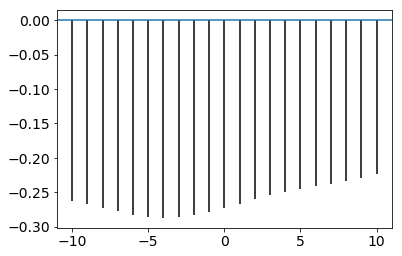

In [10]:
corr = np.correlate(df['gvtec3'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec3'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec3'].values.ravel(),df['s4'].values.ravel())

Delay: 146.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.02184501, -0.02402462, -0.02544443, -0.02498271, -0.02165886,
        -0.0150492 , -0.00558065,  0.00546849,  0.01631681,  0.02524043,
         0.03108407,  0.03346619,  0.03287383,  0.03035592,  0.02715836,
         0.02436099,  0.02263508,  0.02218157,  0.02282218,  0.02415467,
         0.02569624]),
 <matplotlib.lines.Line2D at 0x7f0323ea8390>)

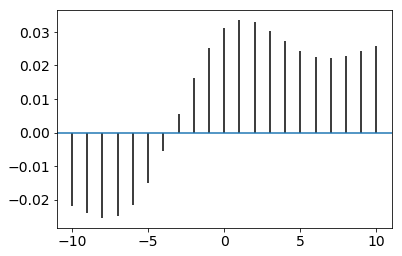

In [11]:
corr = np.correlate(df['gvtec3_dt'].values.ravel(),df['s4'].values.ravel(), "full");
corr = np.abs(corr);
size_corr = len(df['gvtec3_dt'].values.ravel()) - 1

# find the max value in terms of location
point = 0
for i in range(0, len(corr)):
    if corr[point] < corr[i]:
        point = i
print('Delay: %f' %(point - size_corr))

plt.xcorr(df['gvtec3_dt'].values.ravel(),df['s4'].values.ravel())